# <span style="color:blue">HOJA DE EJERCICIOS 6: ILUMINACION, SOMBRAS Y REFLEXIONES</span>


## *Algoritmo de trazado de rayos*

1. Configurar una escena en un espacio 3D con objetos y una fuente de luz.
2. Utilizar una cámara (ojo) para observar la escena desde una posición específica.
3. Definir una pantalla rectangular para proyectar la imagen.
4. Por cada píxel de la pantalla, trazar un rayo desde la cámara hacia ese píxel.
5. Verificar si el rayo intersecta algún objeto en la escena.
6. Calcular el punto de intersección más cercano al ojo.
7. Si no hay objetos obstruyendo la luz entre el punto de intersección y la fuente de luz, calcular el color del punto de intersección.
8. Asignar el color calculado al píxel en la pantalla.
9. Repetir el proceso para cada píxel en la pantalla, llenando así la pantalla con los colores correctos.
10. Obtener la imagen final y guardarla.


## Algoritmo

*Algoritmo de trazado de rayos*

Dado el escenario, este es el algoritmo de trazado de rayos:

Para cada píxel p(x, y, z) de la pantalla:
  - Asignar el color negro a p
  - Si el rayo (línea) que parte de la cámara y va hacia p intersecta con algún objeto de la escena, entonces:
    - Calcular el punto de intersección con el objeto más cercano
    - Si no hay ningún objeto de la escena entre el punto de intersección y la fuente de luz, entonces:
      - Calcular el color del punto de intersección
      - Asignar el color calculado al píxel p

**Nota**: Este algoritmo simula la trayectoria de la luz y las intersecciones con objetos en la escena para producir imágenes con un alto grado de realismo. Se asigna un color a cada píxel en función de cómo la luz interactúa con los objetos de la escena y cómo es reflejada, refractada o absorbida por ellos.


## Configurar la escena


ubicacion de la *cámara* y la *pantalla*. La cámara se sitúa en el punto (x=0, y=0, z=1), y la pantalla forma parte del plano formado por los ejes x e y.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

width = 300
height = 200

camera = np.array([0, 0, 1])
ratio = float(width) / height
screen = (-1, 1 / ratio, 1, -1 / ratio) # left, top, right, bottom

image = np.zeros((height, width, 3))
for i, y in enumerate(np.linspace(screen[1], screen[3], height)):
    for j, x in enumerate(np.linspace(screen[0], screen[2], width)):
        # image[i, j] = ...
        print("progress: %d/%d" % (i + 1, height))

plt.imsave('image.png', image)

progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress: 1/200
progress

- La cámara es representada por una posición en un espacio 3D con 3 coordenadas.
- La pantalla se define por cuatro números (o dos puntos): izquierda, arriba, derecha y abajo. Sus valores van de -1 a 1 en la dirección x y de -1/ratio a 1/ratio en la dirección y, donde la relación es image width / image height.
- La configuración de la pantalla asegura que tenga la misma relación de aspecto que la imagen deseada a producir (300x200 en este caso).
- El bucle consiste en dividir la pantalla en puntos width y height en las direcciones x e y respectivamente, y luego calcular el color del píxel actual.


**pseudocódigo**

✅ Para cada píxel p(x, y, z) de la pantalla:

- Asociar el color negro a p
    - Si el rayo (línea) que parte de la cámara y va hacia p intersecta con algún objeto de la escena, entonces:
        - Calcular el punto de intersección con el objeto más cercano
        - Si no hay ningún objeto de la escena entre el punto de intersección y la fuente de luz, entonces:
            - Calcular el color del punto de intersección
            - Asignar el color calculado al píxel p

## Intersección de rayos


El siguiente paso del algoritmo es verificar si el rayo (línea) que parte de la cámara y va hacia el píxel intersecta con algún objeto de la escena.

Definición de rayo
Un rayo es otra palabra para una línea. En este caso, definimos un "rayo que comienza en la cámara y va hacia el píxel" mediante la ecuación paramétrica:

rayo = posición de la cámara + t * dirección del píxel


El valor de "t" aumenta desde 0, lo que representa la posición de la cámara, hasta valores mayores, alejándose de la cámara en la dirección del píxel.

Para mayor conveniencia, también podemos definir un rayo que comienza en el origen (O) y va hacia el destino (D) con la ecuación:

rayo = O + t * dirección

Ahora podemos completar el código y agregar el cálculo del rayo.




In [14]:
import numpy as np
import matplotlib.pyplot as plt

def normalize(vector):
    return vector / np.linalg.norm(vector)

width = 300
height = 200

camera = np.array([0, 0, 1])
ratio = float(width) / height
screen = (-1, 1 / ratio, 1, -1 / ratio) # left, top, right, bottom

image = np.zeros((height, width, 3))
for i, y in enumerate(np.linspace(screen[1], screen[3], height)):
    for j, x in enumerate(np.linspace(screen[0], screen[2], width)):
        pixel = np.array([x, y, 0])
        origin = camera
        direction = normalize(pixel - origin)

        # image[i, j] = ...
    print("progress: %d/%d" % (i + 1, height))

plt.imsave('image.png', image)

progress: 1/200
progress: 2/200
progress: 3/200
progress: 4/200
progress: 5/200
progress: 6/200
progress: 7/200
progress: 8/200
progress: 9/200
progress: 10/200
progress: 11/200
progress: 12/200
progress: 13/200
progress: 14/200
progress: 15/200
progress: 16/200
progress: 17/200
progress: 18/200
progress: 19/200
progress: 20/200
progress: 21/200
progress: 22/200
progress: 23/200
progress: 24/200
progress: 25/200
progress: 26/200
progress: 27/200
progress: 28/200
progress: 29/200
progress: 30/200
progress: 31/200
progress: 32/200
progress: 33/200
progress: 34/200
progress: 35/200
progress: 36/200
progress: 37/200
progress: 38/200
progress: 39/200
progress: 40/200
progress: 41/200
progress: 42/200
progress: 43/200
progress: 44/200
progress: 45/200
progress: 46/200
progress: 47/200
progress: 48/200
progress: 49/200
progress: 50/200
progress: 51/200
progress: 52/200
progress: 53/200
progress: 54/200
progress: 55/200
progress: 56/200
progress: 57/200
progress: 58/200
progress: 59/200
progre

## Definición de esfera
Una esfera se define como el conjunto de puntos que están todos a la misma distancia r (radio) de un punto dado (centro) .

Por lo tanto, dado el centro C de una esfera y su radio r , un punto arbitrario X se encuentra en la esfera si y solo si:

Una esfera se define como el conjunto de puntos que están todos a la misma distancia r (radio) de un punto dado (centro) .

Por lo tanto, dado el centro C de una esfera y su radio r , un punto arbitrario X se encuentra en la esfera si y solo si:



In [15]:
objects = [
    { 'center': np.array([-0.2, 0, -1]), 'radius': 0.7 },
    { 'center': np.array([0.1, -0.3, 0]), 'radius': 0.1 },
    { 'center': np.array([-0.3, 0, 0]), 'radius': 0.15 }
]

## Intersección de esfera


In [16]:

def sphere_intersect(center, radius, ray_origin, ray_direction):
    b = 2 * np.dot(ray_direction, ray_origin - center)
    c = np.linalg.norm(ray_origin - center) ** 2 - radius ** 2
    delta = b ** 2 - 4 * c
    if delta > 0:
        t1 = (-b + np.sqrt(delta)) / 2
        t2 = (-b - np.sqrt(delta)) / 2
        if t1 > 0 and t2 > 0:
            return min(t1, t2)
    return None


## Objeto cruzado más cercano


In [17]:

def nearest_intersected_object(objects, ray_origin, ray_direction):
    distances = [sphere_intersect(obj['center'], obj['radius'], ray_origin, ray_direction) for obj in objects]
    nearest_object = None
    min_distance = np.inf
    for index, distance in enumerate(distances):
        if distance and distance < min_distance:
            min_distance = distance
            nearest_object = objects[index]
    return nearest_object, min_distance


## Punto de intersección


In [18]:

import numpy as np
import matplotlib.pyplot as plt

def normalize(vector):
    return vector / np.linalg.norm(vector)

def sphere_intersect(center, radius, ray_origin, ray_direction):
    b = 2 * np.dot(ray_direction, ray_origin - center)
    c = np.linalg.norm(ray_origin - center) ** 2 - radius ** 2
    delta = b ** 2 - 4 * c
    if delta > 0:
        t1 = (-b + np.sqrt(delta)) / 2
        t2 = (-b - np.sqrt(delta)) / 2
        if t1 > 0 and t2 > 0:
            return min(t1, t2)
    return None

def nearest_intersected_object(objects, ray_origin, ray_direction):
    distances = [sphere_intersect(obj['center'], obj['radius'], ray_origin, ray_direction) for obj in objects]
    nearest_object = None
    min_distance = np.inf
    for index, distance in enumerate(distances):
        if distance and distance < min_distance:
            min_distance = distance
            nearest_object = objects[index]
    return nearest_object, min_distance

width = 300
height = 200

camera = np.array([0, 0, 1])
ratio = float(width) / height
screen = (-1, 1 / ratio, 1, -1 / ratio) # left, top, right, bottom

objects = [
    { 'center': np.array([-0.2, 0, -1]), 'radius': 0.7 },
    { 'center': np.array([0.1, -0.3, 0]), 'radius': 0.1 },
    { 'center': np.array([-0.3, 0, 0]), 'radius': 0.15 }
]

image = np.zeros((height, width, 3))
for i, y in enumerate(np.linspace(screen[1], screen[3], height)):
    for j, x in enumerate(np.linspace(screen[0], screen[2], width)):
        pixel = np.array([x, y, 0])
        origin = camera
        direction = normalize(pixel - origin)

        # check for intersections
        nearest_object, min_distance = nearest_intersected_object(objects, origin, direction)
        if nearest_object is None:
            continue

        # compute intersection point between ray and nearest object
        intersection = origin + min_distance * direction

        # image[i, j] = ...
        print("%d/%d" % (i + 1, height))

plt.imsave('image.png', image)


45/200
45/200
45/200
45/200
45/200
45/200
45/200
45/200
45/200
45/200
45/200
46/200
46/200
46/200
46/200
46/200
46/200
46/200
46/200
46/200
46/200
46/200
46/200
46/200
46/200
46/200
46/200
46/200
46/200
46/200
46/200
46/200
46/200
46/200
46/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
47/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
48/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200
49/200

In [20]:

objects = [
    { 'center': np.array([-0.2, 0, -1]), 'radius': 0.7, 'ambient': np.array([0.1, 0, 0]), 'diffuse': np.array([0.7, 0, 0]), 'specular': np.array([1, 1, 1]), 'shininess': 100 },
    { 'center': np.array([0.1, -0.3, 0]), 'radius': 0.1, 'ambient': np.array([0.1, 0, 0.1]), 'diffuse': np.array([0.7, 0, 0.7]), 'specular': np.array([1, 1, 1]), 'shininess': 100 },
    { 'center': np.array([-0.3, 0, 0]), 'radius': 0.15, 'ambient': np.array([0, 0.1, 0]), 'diffuse': np.array([0, 0.6, 0]), 'specular': np.array([1, 1, 1]), 'shininess': 100 }
]


In [4]:
def sphere_intersect(center, radius, ray_origin, ray_direction):
    b = 2 * np.dot(ray_direction, ray_origin - center)
    c = np.linalg.norm(ray_origin - center) ** 2 - radius ** 2
    delta = b ** 2 - 4 * c
    if delta > 0:
        t1 = (-b + np.sqrt(delta)) / 2
        t2 = (-b - np.sqrt(delta)) / 2
        if t1 > 0 and t2 > 0:
            return min(t1, t2)
    return None

In [5]:
def nearest_intersected_object(objects, ray_origin, ray_direction):
    distances = [sphere_intersect(obj['center'], obj['radius'], ray_origin, ray_direction) for obj in objects]
    nearest_object = None
    min_distance = np.inf
    for index, distance in enumerate(distances):
        if distance and distance < min_distance:
            min_distance = distance
            nearest_object = objects[index]
    return nearest_object, min_distance

Dado un vector, se puede encontrar otro vector que apunte a la misma dirección pero con una longitud de 1 dividiendo cada componente del primer vector por su longitud; esto se denomina normalización: u = v / ||v|

In [6]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt

# Modulo para normalizar el vector dado 
def normalizar(vector):
    return vector / np.linalg.norm(vector)

## rayo reflejado

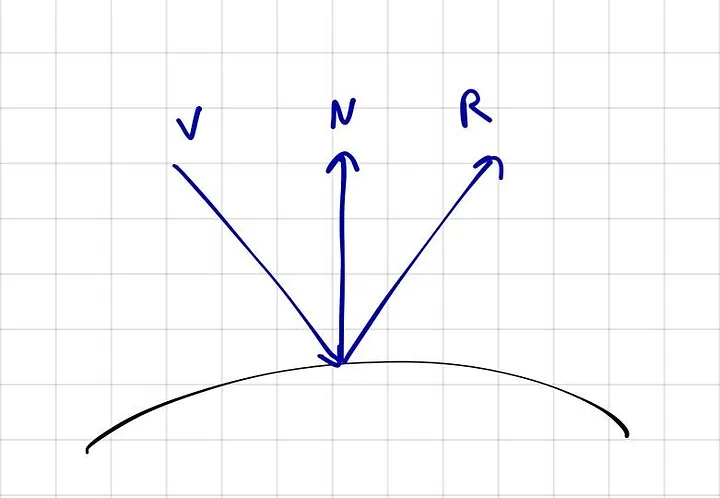
Antes de que podamos codificar esto, necesitamos encontrar la dirección del rayo reflejado. Podemos calcular un rayo reflejado de la siguiente manera:



dónde,

R es el rayo reflejado normalizado;
V es un vector unitario de dirección del rayo a reflejar;
N es el vector unitario de dirección normal a la superficie del trazo del rayo;

In [7]:
# Modulo para hallar el reflejo aplicando la formula y usando la normal (eje)
def reflejado(vector, eje):
    return vector - 2 * np.dot(vector, eje) * eje


## Intersección de luz
Hasta ahora, sabemos si hay una línea recta que va desde la cámara/ojo hasta un objeto, y sabemos qué objeto es, así como exactamente qué parte del objeto estamos mirando. ¡Lo que aún no sabemos es si ese punto específico está iluminado! Tal vez la luz no esté incidiendo en ese punto en particular, y entonces no hay necesidad de ir más allá porque no podemos verlo. Por lo tanto, el siguiente paso es verificar .if there is no object of the scene in-between the intersection point and the light

In [8]:
# Modulo para hallar la interseccion entre un rayo y una esfera
def interseccion_esfera(centro, radio, origen_rayo, direccion_rayo):
    # Hallar b que es el producto punto del rayo y su origen menos en centro de la esfera
    b = 2 * np.dot(direccion_rayo, origen_rayo - centro)
    # Hallar c que es la normalizacion del origen del rayo menos el centro de la esfera, todo menos el radio, con ambos valores elevados al cuadrado
    c = np.linalg.norm(origen_rayo - centro) ** 2 - radio ** 2
    # Hallar el valor delta similar a la discriminante en algebra
    delta = b ** 2 - 4 * c
    # Si delta es mayor a 0
    if delta > 0:
        # Hallar ambos valores resultantes de una ecuacion de segundo grado
        t1 = (-b + np.sqrt(delta)) / 2
        t2 = (-b - np.sqrt(delta)) / 2
        # Si ambos valores son mayores a 0, escoger el menor
        if t1 > 0 and t2 > 0:
            return min(t1, t2)
    # Si no se cumple alguna de las anteriores condiciones, no devolver nada
    return None

## Objeto cruzado más cercano
Muy bien, hasta ahora todo bien, pero aún no hemos completado la instrucción del pseudocódigo que era: . ¡La buena noticia es que podemos hacer esto y la próxima instrucción en un solo golpe! La siguiente instrucción es: .if the ray (line) that starts at camera and goes towards p intersects any object of the scene then[...]calculate the intersection point to the nearest object

Podemos crear fácilmente una función que use sphere_intersect()para encontrar el objeto más cercano que intersecta un rayo, si existe. Simplemente recorremos todas las esferas, buscamos intersecciones y mantenemos la esfera más cercana.

In [9]:
# Modulo para hallar el objeto (esfera) más cercano y la distancia a la que se encuentre
def objeto_intersectado_mas_cercano(objetos, origen_rayo, direccion_rayo):
    # Hallar las distancias de cada objeto
    distancias = [interseccion_esfera(obj['centro'], obj['radio'], origen_rayo, direccion_rayo) for obj in objetos]
    # Inicializamos la variable que contendra el objeto más cercano y la distancia minima
    objeto_mas_cercano = None
    distancia_minima = np.inf
    # Bucle para buscar el objeto más cercano en la lista de objetos
    for indice, distancia in enumerate(distancias):
        # Si se encuentra una distancia menor, actualizar el valor de la distancia minima y objeto más cercano
        if distancia and distancia < distancia_minima:
            distancia_minima = distancia
            objeto_mas_cercano = objetos[indice]
    # Devolver resultados
    return objeto_mas_cercano, distancia_minima


## Configuracion de la escena y la camara 

1/200
2/200
3/200
4/200
5/200
6/200
7/200
8/200
9/200
10/200
11/200
12/200
13/200
14/200
15/200
16/200
17/200
18/200
19/200
20/200
21/200
22/200
23/200
24/200
25/200
26/200
27/200
28/200
29/200
30/200
31/200
32/200
33/200
34/200
35/200
36/200
37/200
38/200
39/200
40/200
41/200
42/200
43/200
44/200
45/200
46/200
47/200
48/200
49/200
50/200
51/200
52/200
53/200
54/200
55/200
56/200
57/200
58/200
59/200
60/200
61/200
62/200
63/200
64/200
65/200
66/200
67/200
68/200
69/200
70/200
71/200
72/200
73/200
74/200
75/200
76/200
77/200
78/200
79/200
80/200
81/200
82/200
83/200
84/200
85/200
86/200
87/200
88/200
89/200
90/200
91/200
92/200
93/200
94/200
95/200
96/200
97/200
98/200
99/200
100/200
101/200
102/200
103/200
104/200
105/200
106/200
107/200
108/200
109/200
110/200
111/200
112/200
113/200
114/200
115/200
116/200
117/200
118/200
119/200
120/200
121/200
122/200
123/200
124/200
125/200
126/200
127/200
128/200
129/200
130/200
131/200
132/200
133/200
134/200
135/200
136/200
137/200
138/200
139/

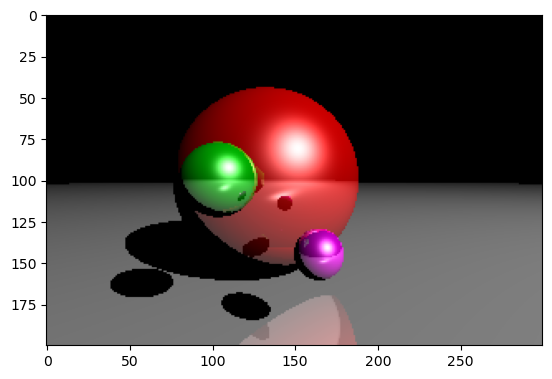

In [11]:
ancho = 300
altura = 200

profundidad_maxima = 3

# Camara y demás valores para visualizar la imagen
camara = np.array([0, 0, 1])
ratio = float(ancho) / altura
pantalla = (-1, 1 / ratio, 1, -1 / ratio) # izquiera, arriba, derecha, abajo

# Luz con sus parametros
luz = { 'posicion': np.array([5, 5, 5]), 'ambiente': np.array([1, 1, 1]), 'difuso':np.array([1, 1, 1]), 'especular': np.array([1, 1, 1]) }

# Lista con los objetos y sus parametros
objetos = [
    { 'centro': np.array([-0.2, 0, -1]), 'radio': 0.7, 'ambiente': np.array([0.1, 0, 0]),
      'difuso': np.array([0.7, 0, 0]), 'especular': np.array([1, 1, 1]), 'brillo': 100,
      'reflexion': 0.5 },
    { 'centro': np.array([0.1, -0.3, 0]), 'radio': 0.1, 'ambiente': np.array([0.1, 0, 0.1]),
      'difuso': np.array([0.7, 0, 0.7]), 'especular': np.array([1, 1, 1]), 'brillo': 100,
      'reflexion': 0.5 },
    { 'centro': np.array([-0.3, 0, 0]), 'radio': 0.15, 'ambiente': np.array([0, 0.1, 0]),
      'difuso': np.array([0, 0.6, 0]), 'especular': np.array([1, 1, 1]), 'brillo': 100,
      'reflexion': 0.5 },
    { 'centro': np.array([0, -9000, 0]), 'radio': 9000 - 0.7, 'ambiente': np.array([0.1, 0.1, 0.1]),
      'difuso': np.array([0.6, 0.6, 0.6]), 'especular': np.array([1, 1, 1]), 'brillo': 100,
      'reflexion': 0.5 }
]
# Creacion de la imagen final
imagen = np.zeros((altura, ancho, 3))
# Crear bucles para evaluar cada punto en la pantalla y asignarle su respectivo color
for i, y in enumerate(np.linspace(pantalla[1], pantalla[3], altura)):
    for j, x in enumerate(np.linspace(pantalla[0], pantalla[2], ancho)):
        # pantalla esta en el origen
        pixel = np.array([x, y, 0])
        origen = camara
        direccion = normalizar(pixel - origen)

        color = np.zeros((3))
        reflexion = 1
        
        for k in range(profundidad_maxima):
            # verifica por intersecciones
            objeto_mas_cercano, distancia_minima = objeto_intersectado_mas_cercano(objetos, origen, direccion)
            # Si no hay objetos, salir del bucle for
            if objeto_mas_cercano is None:
                break

            # Hacer uso de los modulos previamente comentados
            interseccion = origen + distancia_minima * direccion
            normal_a_superficie = normalizar(interseccion - objeto_mas_cercano['centro'])
            punto_desplazado = interseccion + 1e-5 * normal_a_superficie
            interseccion_con_luz = normalizar(luz['posicion'] - punto_desplazado)

            _, distancia_minima = objeto_intersectado_mas_cercano(objetos, punto_desplazado, interseccion_con_luz)
            interseccion_con_luz_distancia = np.linalg.norm(luz['posicion'] - interseccion)
            esta_sombreado = distancia_minima < interseccion_con_luz_distancia

            # Si el la distancia minima del objeto más cercano es menor que la interseccion con la luz, salir del bucle for
            if esta_sombreado:
                break
            
            # Crear un array con 3 coordenadas con valor 0
            iluminacion = np.zeros((3))
            
            # ambiente
            iluminacion += objeto_mas_cercano['ambiente'] * luz['ambiente']
            
            # difuso
            iluminacion += objeto_mas_cercano['difuso'] * luz['difuso'] * np.dot(interseccion_con_luz, normal_a_superficie)
            
            # especular
            interseccion_a_camara = normalizar(camara - interseccion)
            H = normalizar(interseccion_con_luz + interseccion_a_camara)
            iluminacion += objeto_mas_cercano['especular'] * luz['especular'] * np.dot(normal_a_superficie, H) ** (objeto_mas_cercano['brillo'] / 4)

            # reflexion
            color += reflexion * iluminacion
            reflexion *= objeto_mas_cercano['reflexion']
            
            origen = punto_desplazado
            direccion = reflejado(direccion, normal_a_superficie)
            
        imagen[i, j] = np.clip(color, 0, 1)
    print("%d/%d" % (i + 1, altura))

# Guardar imagen
plt.imsave('imagen.png', imagen)
# Poner la imagen en el plot
imgplot = plt.imshow(imagen)
# Mostrar el plot
plt.show()


1/200
2/200
3/200
4/200
5/200
6/200
7/200
8/200
9/200
10/200
11/200
12/200
13/200
14/200
15/200
16/200
17/200
18/200
19/200
20/200
21/200
22/200
23/200
24/200
25/200
26/200
27/200
28/200
29/200
30/200
31/200
32/200
33/200
34/200
35/200
36/200
37/200
38/200
39/200
40/200
41/200
42/200
43/200
44/200
45/200
46/200
47/200
48/200
49/200
50/200
51/200
52/200
53/200
54/200
55/200
56/200
57/200
58/200
59/200
60/200
61/200
62/200
63/200
64/200
65/200
66/200
67/200
68/200
69/200
70/200
71/200
72/200
73/200
74/200
75/200
76/200
77/200
78/200
79/200
80/200
81/200
82/200
83/200
84/200
85/200
86/200
87/200
88/200
89/200
90/200
91/200
92/200
93/200
94/200
95/200
96/200
97/200
98/200
99/200
100/200
101/200
102/200
103/200
104/200
105/200
106/200
107/200
108/200
109/200
110/200
111/200
112/200
113/200
114/200
115/200
116/200
117/200
118/200
119/200
120/200
121/200
122/200
123/200
124/200
125/200
126/200
127/200
128/200
129/200
130/200
131/200
132/200
133/200
134/200
135/200
136/200
137/200
138/200
139/

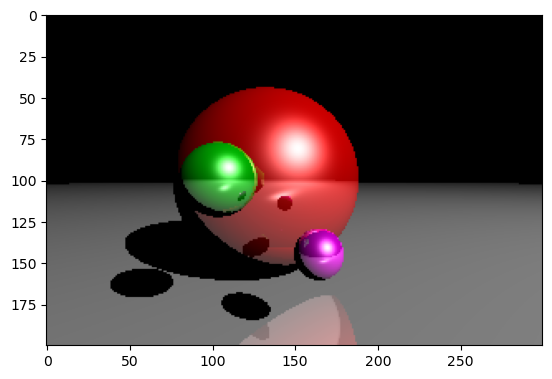

In [1]:

# Modulo para hallar el reflejo aplicando la formula y usando la normal (eje)
def reflejado(vector, eje):
    return vector - 2 * np.dot(vector, eje) * eje

# Modulo para hallar la interseccion entre un rayo y una esfera
def interseccion_esfera(centro, radio, origen_rayo, direccion_rayo):
    # Hallar b que es el producto punto del rayo y su origen menos en centro de la esfera
    b = 2 * np.dot(direccion_rayo, origen_rayo - centro)
    # Hallar c que es la normalizacion del origen del rayo menos el centro de la esfera, todo menos el radio, con ambos valores elevados al cuadrado
    c = np.linalg.norm(origen_rayo - centro) ** 2 - radio ** 2
    # Hallar el valor delta similar a la discriminante en algebra
    delta = b ** 2 - 4 * c
    # Si delta es mayor a 0
    if delta > 0:
        # Hallar ambos valores resultantes de una ecuacion de segundo grado
        t1 = (-b + np.sqrt(delta)) / 2
        t2 = (-b - np.sqrt(delta)) / 2
        # Si ambos valores son mayores a 0, escoger el menor
        if t1 > 0 and t2 > 0:
            return min(t1, t2)
    # Si no se cumple alguna de las anteriores condiciones, no devolver nada
    return None

# Modulo para hallar el objeto (esfera) más cercano y la distancia a la que se encuentre
def objeto_intersectado_mas_cercano(objetos, origen_rayo, direccion_rayo):
    # Hallar las distancias de cada objeto
    distancias = [interseccion_esfera(obj['centro'], obj['radio'], origen_rayo, direccion_rayo) for obj in objetos]
    # Inicializamos la variable que contendra el objeto más cercano y la distancia minima
    objeto_mas_cercano = None
    distancia_minima = np.inf
    # Bucle para buscar el objeto más cercano en la lista de objetos
    for indice, distancia in enumerate(distancias):
        # Si se encuentra una distancia menor, actualizar el valor de la distancia minima y objeto más cercano
        if distancia and distancia < distancia_minima:
            distancia_minima = distancia
            objeto_mas_cercano = objetos[indice]
    # Devolver resultados
    return objeto_mas_cercano, distancia_minima

ancho = 300
altura = 200

profundidad_maxima = 3

# Camara y demás valores para visualizar la imagen
camara = np.array([0, 0, 1])
ratio = float(ancho) / altura
pantalla = (-1, 1 / ratio, 1, -1 / ratio) # izquiera, arriba, derecha, abajo

# Luz con sus parametros
luz = { 'posicion': np.array([5, 5, 5]), 'ambiente': np.array([1, 1, 1]), 'difuso':np.array([1, 1, 1]), 'especular': np.array([1, 1, 1]) }

# Lista con los objetos y sus parametros
objetos = [
    { 'centro': np.array([-0.2, 0, -1]), 'radio': 0.7, 'ambiente': np.array([0.1, 0, 0]),
      'difuso': np.array([0.7, 0, 0]), 'especular': np.array([1, 1, 1]), 'brillo': 100,
      'reflexion': 0.5 },
    { 'centro': np.array([0.1, -0.3, 0]), 'radio': 0.1, 'ambiente': np.array([0.1, 0, 0.1]),
      'difuso': np.array([0.7, 0, 0.7]), 'especular': np.array([1, 1, 1]), 'brillo': 100,
      'reflexion': 0.5 },
    { 'centro': np.array([-0.3, 0, 0]), 'radio': 0.15, 'ambiente': np.array([0, 0.1, 0]),
      'difuso': np.array([0, 0.6, 0]), 'especular': np.array([1, 1, 1]), 'brillo': 100,
      'reflexion': 0.5 },
    { 'centro': np.array([0, -9000, 0]), 'radio': 9000 - 0.7, 'ambiente': np.array([0.1, 0.1, 0.1]),
      'difuso': np.array([0.6, 0.6, 0.6]), 'especular': np.array([1, 1, 1]), 'brillo': 100,
      'reflexion': 0.5 }
]

imagen = np.zeros((altura, ancho, 3))
# Crear bucles para evaluar cada punto en la pantalla y asignarle su respectivo color
for i, y in enumerate(np.linspace(pantalla[1], pantalla[3], altura)):
    for j, x in enumerate(np.linspace(pantalla[0], pantalla[2], ancho)):
        # pantalla esta en el origen
        pixel = np.array([x, y, 0])
        origen = camara
        direccion = normalizar(pixel - origen)

        color = np.zeros((3))
        reflexion = 1
        
        for k in range(profundidad_maxima):
            # verifica por intersecciones
            objeto_mas_cercano, distancia_minima = objeto_intersectado_mas_cercano(objetos, origen, direccion)
            # Si no hay objetos, salir del bucle for
            if objeto_mas_cercano is None:
                break

            # Hacer uso de los modulos previamente comentados
            interseccion = origen + distancia_minima * direccion
            normal_a_superficie = normalizar(interseccion - objeto_mas_cercano['centro'])
            punto_desplazado = interseccion + 1e-5 * normal_a_superficie
            interseccion_con_luz = normalizar(luz['posicion'] - punto_desplazado)

            _, distancia_minima = objeto_intersectado_mas_cercano(objetos, punto_desplazado, interseccion_con_luz)
            interseccion_con_luz_distancia = np.linalg.norm(luz['posicion'] - interseccion)
            esta_sombreado = distancia_minima < interseccion_con_luz_distancia

            # Si el la distancia minima del objeto más cercano es menor que la interseccion con la luz, salir del bucle for
            if esta_sombreado:
                break
            
            # Crear un array con 3 coordenadas con valor 0
            iluminacion = np.zeros((3))
            
            # ambiente
            iluminacion += objeto_mas_cercano['ambiente'] * luz['ambiente']
            
            # difuso
            iluminacion += objeto_mas_cercano['difuso'] * luz['difuso'] * np.dot(interseccion_con_luz, normal_a_superficie)
            
            # especular
            interseccion_a_camara = normalizar(camara - interseccion)
            H = normalizar(interseccion_con_luz + interseccion_a_camara)
            iluminacion += objeto_mas_cercano['especular'] * luz['especular'] * np.dot(normal_a_superficie, H) ** (objeto_mas_cercano['brillo'] / 4)

            # reflexion
            color += reflexion * iluminacion
            reflexion *= objeto_mas_cercano['reflexion']
            
            origen = punto_desplazado
            direccion = reflejado(direccion, normal_a_superficie)
            
        imagen[i, j] = np.clip(color, 0, 1)
    print("%d/%d" % (i + 1, altura))

# Guardar imagen
plt.imsave('imagen.png', imagen)
# Poner la imagen en el plot
imgplot = plt.imshow(imagen)
# Mostrar el plot
plt.show()
